In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def process_image2(image_path, resize_factor=1.0):
    # 이미지 읽기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지 리사이징
    if resize_factor != 1.0:
        new_size = (int(image.shape[1] * resize_factor), int(image.shape[0] * resize_factor))
        image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    # 선명도 향상을 위한 처리
    kernel_sharpening = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    image = cv2.filter2D(image, -1, kernel_sharpening)

    # 이진화를 통한 라인 추출
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # 스켈레톤화
    skeleton = cv2.ximgproc.thinning(binary)

    # 라인 추출을 위한 이미지 처리 및 계층 정보 획득
    contours, hierarchy = cv2.findContours(skeleton, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 각 선분의 픽셀 좌표 추출
    line_segments = [cv2.approxPolyDP(contour, 1, False) for contour in contours]

    return line_segments, hierarchy

In [4]:
def visualize_line_segments_with_plt(image_path, line_segments, resize_factor=1.0):
    # 이미지 읽기
    image = cv2.imread(image_path)
    if resize_factor != 1.0:
        new_size = (int(image.shape[1] * resize_factor), int(image.shape[0] * resize_factor))
        image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    # BGR 이미지를 RGB로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 선분 그리기 준비
    plt.imshow(image)
    for segment in line_segments:
        # segment는 (x, y) 좌표의 리스트
        xs, ys = zip(*[pt[0] for pt in segment])
        plt.plot(xs, ys, color='green')  # 녹색 선으로 표시

    # 시각화된 이미지 보여주기
    plt.show()

In [28]:
def process_image_with_hierarchy(image_path):
    # 이미지 읽기 및 그레이스케일 변환
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이진화를 통한 라인 추출
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # 라인 추출 및 계층 정보 획득
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 원본 이미지를 컬러로 복사
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # 모든 계층의 외곽선을 이미지에 그리기
    cv2.drawContours(image_color, contours, -1, (0, 255, 0), 3)  # 녹색으로 외곽선을 그림

    # Matplotlib을 사용하여 이미지 표시
    plt.figure()
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # RGB 형식으로 변환
    plt.show()

    return contours, hierarchy


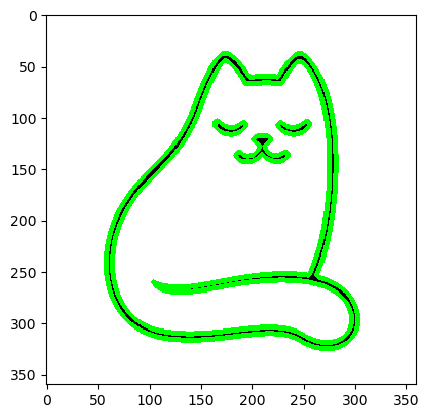

In [29]:
contours, hierarchy = process_image_with_hierarchy("./cat.jpg")

In [20]:
for contour in contours:
    # Contour의 시작점과 끝점 처리
    for point_idx, point in enumerate(contour):
        if point_idx >= 0 and point_idx <= len(contour):
            print(point_idx, point)

0 [[171  38]]
1 [[164  45]]
2 [[164  46]]
3 [[162  48]]
4 [[162  49]]
5 [[160  51]]
6 [[160  52]]
7 [[159  53]]
8 [[159  54]]
9 [[158  55]]
10 [[158  56]]
11 [[157  57]]
12 [[157  58]]
13 [[156  59]]
14 [[156  60]]
15 [[155  61]]
16 [[155  62]]
17 [[154  63]]
18 [[154  64]]
19 [[153  65]]
20 [[153  66]]
21 [[152  67]]
22 [[152  69]]
23 [[151  70]]
24 [[151  71]]
25 [[150  72]]
26 [[150  74]]
27 [[149  75]]
28 [[149  76]]
29 [[148  77]]
30 [[148  79]]
31 [[147  80]]
32 [[147  81]]
33 [[146  82]]
34 [[146  84]]
35 [[145  85]]
36 [[145  87]]
37 [[144  88]]
38 [[144  89]]
39 [[143  90]]
40 [[143  92]]
41 [[142  93]]
42 [[142  94]]
43 [[141  95]]
44 [[141  97]]
45 [[140  98]]
46 [[140  99]]
47 [[139 100]]
48 [[139 101]]
49 [[138 102]]
50 [[138 103]]
51 [[137 104]]
52 [[137 105]]
53 [[136 106]]
54 [[136 107]]
55 [[135 108]]
56 [[135 109]]
57 [[134 110]]
58 [[134 111]]
59 [[133 112]]
60 [[133 113]]
61 [[131 115]]
62 [[131 116]]
63 [[130 117]]
64 [[130 118]]
65 [[128 120]]
66 [[128 121]]
67 [[

In [31]:
line_segments, hierarchy = process_image2("./cat.jpg", resize_factor=0.5)

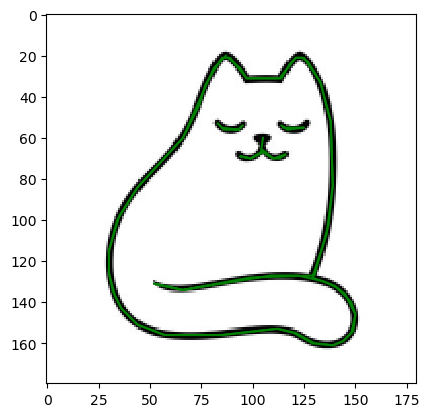

In [32]:
visualize_line_segments_with_plt("./cat.jpg", line_segments, resize_factor=0.5)